In [465]:
import csv
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [466]:
# Loading the training data
traindata= pd.read_csv("train_features_2013-03-07.csv")
traindata.shape


(1000000, 8)

In [467]:
traindata.isnull().sum()


jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64

In [468]:
trainclasses = pd.read_csv("train_salaries_2013-03-07.csv")
salaries= trainclasses.salary
#Merging the classses and attributes columns
totaldata = pd.merge(traindata, trainclasses, how= "left")
# The attribute values must be integers or float values. So label encoding converts the string to int/ float
labelencoder = LabelEncoder()
for col in totaldata.columns:
    totaldata[col] = labelencoder.fit_transform(totaldata[col])
    

In [469]:
totaldata.describe()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,499999.500000,31.004196,3.505316,2.122665,5.419789,3.000333,11.992386,49.529260,100.061876
std,288675.278933,18.169813,2.291724,1.408910,2.398845,2.000704,7.212391,28.877733,38.717611
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,249999.750000,15.000000,2.000000,1.000000,4.000000,1.000000,6.000000,25.000000,72.000000
50%,499999.500000,31.000000,4.000000,2.000000,7.000000,3.000000,12.000000,50.000000,98.000000
75%,749999.250000,47.000000,6.000000,3.000000,7.000000,5.000000,18.000000,75.000000,125.000000
max,999999.000000,62.000000,7.000000,4.000000,8.000000,6.000000,24.000000,99.000000,279.000000


In [470]:
#print(trainclasses)
totaldata.head()

#trainattributes.describe()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,0,31,1,3,6,3,10,83,114
1,1,11,0,2,7,6,3,73,85
2,2,48,7,1,8,3,10,38,121
3,3,32,5,1,2,0,8,17,126
4,4,60,7,0,8,2,8,16,147


In [471]:
# corelation between the attributes
totaldata.corr()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
jobId,1.000000,0.000617,0.001394,-0.002249,0.000132,0.000429,0.000913,0.001896,-0.000793
companyId,0.000617,1.000000,-0.000284,-0.000057,0.000780,-0.001446,0.001185,-0.001020,-0.000993
jobType,0.001394,-0.000284,1.000000,-0.020084,-0.020774,0.000069,-0.000186,-0.000365,-0.228673
degree,-0.002249,-0.000057,-0.020084,1.000000,0.370089,0.001551,-0.000144,-0.001359,-0.231791
major,0.000132,0.000780,-0.020774,0.370089,1.000000,0.001075,0.000012,-0.001369,-0.262432
industry,0.000429,-0.001446,0.000069,0.001551,0.001075,1.000000,0.000263,-0.000819,0.086502
yearsExperience,0.000913,0.001185,-0.000186,-0.000144,0.000012,0.000263,1.000000,0.000673,0.375014
milesFromMetropolis,0.001896,-0.001020,-0.000365,-0.001359,-0.001369,-0.000819,0.000673,1.000000,-0.297670
salary,-0.000793,-0.000993,-0.228673,-0.231791,-0.262432,0.086502,0.375014,-0.297670,1.000000


In [472]:
# seperating the attributes and class after encoding
trainattributes = totaldata.iloc[:,0:8]
trainattributes.size
trainclasses = totaldata.iloc[:,8]
trainclasses.head()

0    114
1     85
2    121
3    126
4    147
Name: salary, dtype: int64

In [473]:
# Standardising the data. scaling between 1 and -1
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
trainscalar = scalar.fit_transform(trainattributes)
trainscalar

array([[ -1.73204908e+00,  -2.30932598e-04,  -1.09320219e+00, ...,
         -1.66441529e-04,  -2.76245011e-01,   1.15905072e+00],
       [ -1.73204561e+00,  -1.10095828e+00,  -1.52955521e+00, ...,
          1.49930679e+00,  -1.24679744e+00,   8.12762970e-01],
       [ -1.73204215e+00,   9.35387315e-01,   1.52491591e+00, ...,
         -1.66441529e-04,  -2.76245011e-01,  -3.99244148e-01],
       ..., 
       [  1.73204215e+00,  -8.25776445e-01,   2.15856856e-01, ...,
         -9.99815265e-01,   5.55657074e-01,   1.08979317e+00],
       [  1.73204561e+00,  -4.40521873e-01,  -1.09320219e+00, ...,
         -1.66441529e-04,  -8.30846401e-01,  -1.54199372e+00],
       [  1.73204908e+00,   1.32064189e+00,   2.15856856e-01, ...,
         -9.99815265e-01,   1.11025846e+00,  -1.33422107e+00]])

In [474]:
# Principal Component Analysis to identify the features with maximum varience
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(trainscalar)
print(pd.DataFrame(pca.components_))
#print(pd.DataFrame(pca.components_,columns=trainscalar,index = ['PC-1','PC-2']))


# from the below matrix we can notice that attributes with indices 2,3,4 explain the maximum varience of 0.7 

          0         1         2         3         4         5         6  \
0  0.004316 -0.001414  0.077365 -0.704934 -0.704990 -0.004959  0.000224   
1 -0.643249 -0.233091 -0.076009 -0.006004 -0.010855  0.140079 -0.465317   
2 -0.221756  0.726091 -0.111077 -0.007469 -0.006303 -0.511903  0.193670   
3 -0.168354 -0.209038 -0.178361 -0.005663 -0.006205 -0.676758 -0.424478   
4  0.498000  0.199062  0.502335  0.026989  0.029605 -0.115729 -0.619373   
5  0.129056  0.448069 -0.619589 -0.035960 -0.033665  0.416980 -0.420910   
6  0.493977 -0.366562 -0.554846 -0.031270 -0.027455 -0.270260  0.070726   
7  0.004551  0.001585 -0.001338  0.707068 -0.707127 -0.000909  0.000280   

          7  
0  0.005126  
1 -0.538355  
2 -0.334110  
3  0.507833  
4 -0.247808  
5  0.212659  
6 -0.483727  
7 -0.000042  


In [475]:
covariance= pca.get_covariance()

In [476]:
explained_variance = pca.explained_variance_
explained_variance


array([ 1.37235915,  1.00252458,  1.00165488,  1.00048131,  0.99936059,
        0.99757364,  0.99615226,  0.62990158])

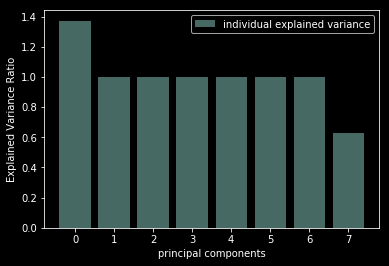

In [477]:
# Visualizing explained varience ratio
from matplotlib import pyplot as plt
import numpy as np
with plt.style.context('dark_background'):
    plt.figure(figsize=(6,4))
    plt.bar(np.arange(len(explained_variance)), explained_variance, alpha = 0.5, align='center' , label= 'individual explained variance')
    plt.ylabel("Explained Variance Ratio")
    plt.xlabel("principal components")
    plt.legend(loc="best")
    
   #plt.tight_layout()
    plt.show()

In [478]:
trainattributes = totaldata.iloc[:,2:5]
print(trainattributes)
testdata = pd.read_csv("test_features_2013-03-07.csv")
#X_train, X_test, y_train, y_test = train_test_split(trainscalar,trainclasses.salary,test_size=0.2,random_state=4)
testfeatures = testdata.iloc[:,2:5]
print(testfeatures)

        jobType  degree  major
0             1       3      6
1             0       2      7
2             7       1      8
3             5       1      2
4             7       0      8
5             5       1      3
6             1       4      7
7             4       0      2
8             3       2      7
9             7       0      2
10            3       2      7
11            0       3      8
12            4       4      7
13            4       3      6
14            3       4      7
15            2       3      0
16            4       3      8
17            7       3      5
18            0       3      5
19            0       3      8
20            3       4      7
21            4       4      7
22            4       0      5
23            4       4      7
24            0       0      7
25            1       0      2
26            0       0      3
27            2       3      1
28            3       2      7
29            6       1      1
...         ...     ...    ...
999970  

In [479]:
# encoding testattributes
for col in testfeatures.columns:
    testfeatures[col] = labelencoder.fit_transform(testfeatures[col])

In [480]:
# Applying regression model with the features extracted from PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model1 =linear_model.LinearRegression()

In [481]:
model1.fit(trainattributes, trainclasses)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [482]:
# predicting the results
salary_pred = model1.predict(testfeatures)
#totaltest =pd.concat(testdata.jobId, salary_pred)
print(salary_pred)

[  89.32118126   84.54915017  120.44930757 ...,   88.53969416  109.03664105
   84.54915017]


In [483]:
# saving the predictions to a csv file
prediction = pd.DataFrame(salary_pred, columns=['salary']).to_csv('test_salaries.csv')
jobId= traindata.jobId

csv_input = pd.read_csv('test_salaries.csv')
csv_input['jobId']= jobId
csv_input.to_csv('test_salaries.csv', index=False) 


In [484]:
print(model1.coef_)

[-3.99054399 -4.38128754 -3.36254027]


In [ ]:
print("MSE",mean_squared_error(y_test, salary_pred))

In [ ]:
print("Explained variance", r2_score(y_test, salary_pred))
model1.score(X_test, salary_pred)

In [ ]:
plt.scatter(y_test, salary_pred,  color='black')
plt.plot(y_test, salary_pred)
plt.show()